In [1]:
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import hdbscan
from list_of_clusters import ListOfClusters

%matplotlib inline

np.random.seed(0)
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

In [2]:
def make_var_density_blobs(n_samples=750, centers=[[0,0]], cluster_std=[0.5]):
    samples_per_blob = n_samples // len(centers)
    blobs = [datasets.make_blobs(n_samples=samples_per_blob, centers=[c],
                                 cluster_std=cluster_std[i])[0]
             for i, c in enumerate(centers)]
    labels = [i * np.ones(samples_per_blob) for i in range(len(centers))]
    return np.vstack(blobs), np.hstack(labels)

# Elegimos el tamaño lo suficientemente grande como para ver la
# escalabilidad de los algoritmos, pero no demasiado grande para
# evitar tiempos de ejecución demasiado largos.
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.055)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.065)
blobs = datasets.make_blobs(n_samples=n_samples-200, random_state=8)
noisy_blobs = np.vstack((blobs[0], 25.0*np.random.rand(200, 2)-[10.0,10.0])),\
            np.hstack((blobs[1], -1*np.ones(200)))
varying_blobs = make_var_density_blobs(n_samples,
                                       centers=[[1, 1],
                                                [-1, -1],
                                                [1, -1]],
                                       cluster_std=[0.2, 0.35, 0.5])

# Aplicamos transformación a blobs
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

no_structure = np.random.rand(n_samples, 2), None
easy_blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

clustering_datasets = [noisy_circles, noisy_moons, noisy_blobs, varying_blobs, aniso, easy_blobs,no_structure]
dataset_names = ['Círculos', 'Lunas', 'Manchas con ruido', 'Manchas variantes', 'Agujas', 'Manchas fáciles', 'Aleatorio']

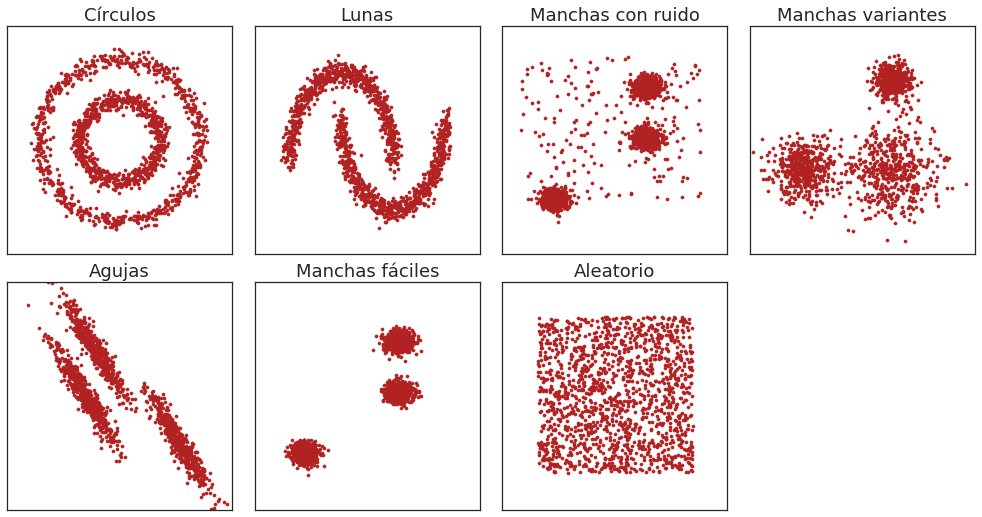

In [3]:

plt.figure(figsize=(len(clustering_datasets)*2, 7))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.1, hspace=.12)

plot_num = 1

for i_dataset, dataset in enumerate(clustering_datasets):  
    X, y = dataset
    # Normalizamos el dataset para una selección de parámetros más sencilla.
    # Estandarizamos las características removiendo la media y
    # escalando a varianza unitaria.
    X = StandardScaler().fit_transform(X)
    
    # Graficamos
    ax = plt.subplot(2, 4, plot_num)
    plt.title(dataset_names[i_dataset], size=18)
    plt.scatter(X[:, 0], X[:, 1], s=10, c='firebrick')
    
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1

# plt.savefig('Raw_datasets.png', dpi=100)
plt.show()